# MINI PROJECT - 1

Team - 7

Parth Shyam Shukla - MB24019 - worked with Data cleaning

Abhishek Mohan - MB24041 - Data visualization

Aishwarya - MB24049 - Machine learning algorithms



# About this Dataset

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

# Features

enrollee_id : Unique ID for candidate.

city: City code.

city_ development _index : Developement index of the city (scaled).

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

# What we additionaly did

1. Data cleaning: In the given analysis, data is cleaned by just droping out. We used imputation techniques like substituting mean or mode to the suitable data types for cleaning.

2. Data Visualization: Analyzed all demographic data of the candidates.

3. data balancing in the given kaggle code is done by SMOTE borderline algorithm only, we also tried Random Oversampling and SMOTE Techniques to improve the performance

In [66]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
df_train=pd.read_csv("C:/Users/neyve/Downloads/aug_train.csv/aug_train.csv")
df_test=pd.read_csv("C:/Users/neyve/Downloads/aug_train.csv/aug_test.csv")
df_train=pd.DataFrame(df_train)
df_test=pd.DataFrame(df_test)
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,more than 20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,more than 10,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,less than 1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,more than 20,50-99,Funded Startup,4,8,0


In [68]:
df_train['gender']=df_train['gender'].fillna(df_train['gender'].mode()[0])
df_train['enrolled_university']=df_train['enrolled_university'].fillna(df_train['enrolled_university'].mode()[0])
df_train['education_level']=df_train['education_level'].fillna(df_train['education_level'].mode()[0])
df_train['major_discipline']=df_train['major_discipline'].fillna(df_train['major_discipline'].mode()[0])
df_train['company_size']=df_train['company_size'].fillna(df_train['company_size'].mode()[0])
df_train['company_type']=df_train['company_type'].fillna(df_train['company_type'].mode()[0])
df_train['last_new_job']=df_train['last_new_job'].fillna(df_train['last_new_job'].mode()[0])
df_train.dropna(inplace=True)
df_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [69]:
df_test['gender']=df_test['gender'].fillna(df_test['gender'].mode()[0])
df_test['enrolled_university']=df_test['enrolled_university'].fillna(df_test['enrolled_university'].mode()[0])
df_test['education_level']=df_test['education_level'].fillna(df_test['education_level'].mode()[0])
df_test['major_discipline']=df_test['major_discipline'].fillna(df_test['major_discipline'].mode()[0])
df_test['company_size']=df_test['company_size'].fillna(df_test['company_size'].mode()[0])
df_test['company_type']=df_test['company_type'].fillna(df_test['company_type'].mode()[0])
df_test['last_new_job']=df_test['last_new_job'].fillna(df_test['last_new_job'].mode()[0])
df_test.dropna(inplace=True)
df_test.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

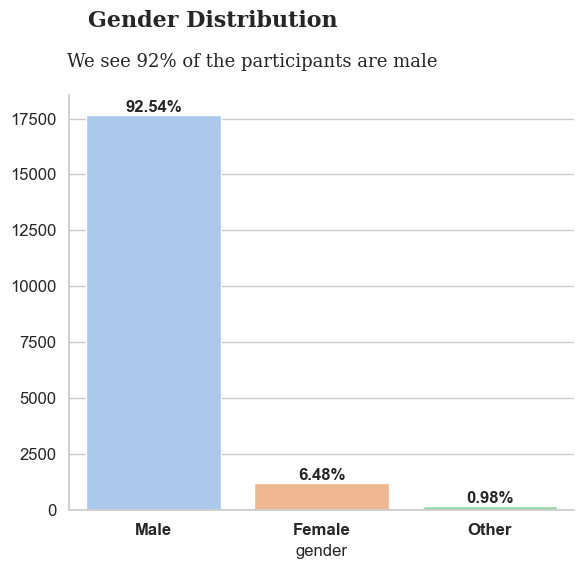

In [70]:

# GENDER DISTRIBUTION
gender_counts = df_train['gender'].value_counts()
total_count = len(df_train)
gender_percentages = (gender_counts / total_count) * 100

# Create the bar chart using seaborn
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_theme(style='whitegrid')

# Improved color palette for better differentiation
palette = sns.color_palette("pastel")

# Seaborn barplot with percentage and frequency
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax, palette=palette)

# Add percentage labels at the top of each bar
for i, percentage in enumerate(gender_percentages):
    ax.text(i, gender_counts.values[i] + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title with improved styling
#ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
#ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
#ax.set_title('Gender Distribution of Candidates', fontsize=16, fontweight='bold', color='navy', pad=30)

# Customizing the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.setp(ax.get_xticklabels(), fontweight='bold')

# Removing the top and right borders for a cleaner look
sns.despine()

# Add informative subtitle
#fig.text(0.8, 0.87, 'It seems 92% of candidates are male', fontsize=12, color='gray', ha='center')
fig.text(0.160,1.1,'Gender Distribution', fontfamily='serif',fontsize=16, fontweight='bold')
fig.text(0.125,1.02,'We see 92% of the participants are male',fontfamily='serif',fontsize=13) 
# Show the plot
plt.tight_layout()
plt.show()

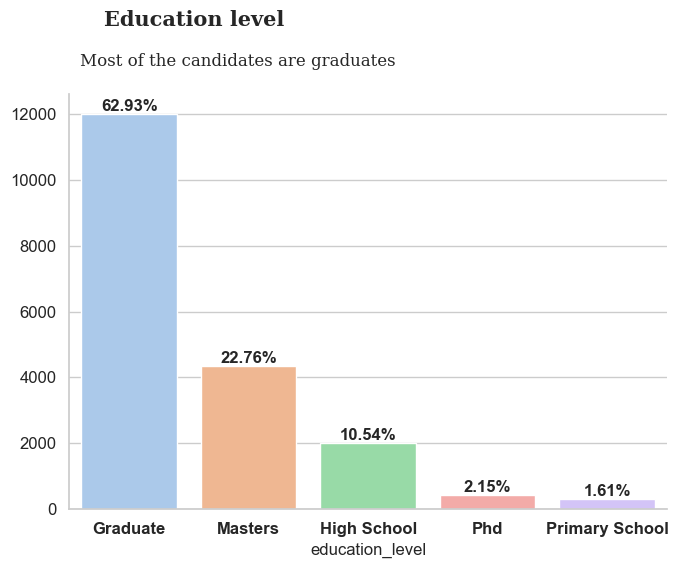

In [71]:
# EDUCATION LEVEL
edulevel_counts = df_train['education_level'].value_counts()
total_count = len(df_train)
edulevel_percentages = (edulevel_counts / total_count) * 100

# Create the bar chart using seaborn
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_theme(style='whitegrid')

# Improved color palette for better differentiation
palette = sns.color_palette("pastel")

# Seaborn barplot with percentage and frequency
sns.barplot(x=edulevel_counts.index, y=edulevel_counts.values, ax=ax, palette=palette)

# Add percentage labels at the top of each bar
for i, percentage in enumerate(edulevel_percentages):
    ax.text(i, edulevel_counts.values[i] + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title with improved styling
#ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
#ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
#ax.set_title('Gender Distribution of Candidates', fontsize=16, fontweight='bold', color='navy', pad=30)

# Customizing the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.setp(ax.get_xticklabels(), fontweight='bold')

# Removing the top and right borders for a cleaner look
sns.despine()

# Add informative subtitle
#fig.text(0.8, 0.87, 'It seems 92% of candidates are male', fontsize=12, color='gray', ha='center')
fig.text(0.160,1.1,'Education level', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,1.02,'Most of the candidates are graduates',fontfamily='serif',fontsize=12) 
# Show the plot
plt.tight_layout()
plt.show()

In [46]:
df_train['company_size'] = df_train['company_size'].replace({'less than 10': '10', 'Oct-49': '10','10000+':'10000'}).astype(str)
df_test['company_size'] = df_test['company_size'].replace({'less than 10': '10', 'Oct-49': '10','10000+':'10000'}).astype(str)
df_train['last_new_job'] = df_train['last_new_job'].replace({'more than 10': 5, 'never': 0}).astype(float)
df_test['last_new_job'] = df_test['last_new_job'].replace({'more than 4': 5}).astype(float)
df_train['city'] = df_train['city'].str.replace('_', '')
df_test['city'] = df_test['city'].str.replace('_', '')
df_train['experience'] = df_train['experience'].replace({'more than 20': 21, 'less than 1': 0.5}).astype(float)
df_train['experience'] = pd.to_numeric(df_train['experience'])

# Define bins for clustering the experience into broader categories
bins = [0, 1, 5, 10, 20, float('inf')]  # Binning the values
labels = ['Entry-level (0-1)', 'Junior (2-5)', 'Mid-level (6-10)', 'Senior (11-20)', 'Very Senior (21+)']

# Use pd.cut to cluster experience
df_train['experience_set'] = pd.cut(df_train['experience'], bins=bins, labels=labels, include_lowest=True)

# Aggregate counts within each experience cluster
clustered_data = df_train['experience_set'].value_counts().sort_index().reset_index()
clustered_data.columns = ['Experience Cluster', 'Count']
# Display the clustered data
print(clustered_data)

  Experience Cluster  Count
0  Entry-level (0-1)   1071
1       Junior (2-5)   5314
2   Mid-level (6-10)   5011
3     Senior (11-20)   4411
4  Very Senior (21+)   3286


In [47]:
df_test['experience'] = df_test['experience'].replace({'more than 20': 21, 'less than 1': 0.5}).astype(float)
df_test['experience'] = pd.to_numeric(df_train['experience'])

# Define bins for clustering the experience into broader categories
bins = [0, 1, 5, 10, 20, float('inf')]  # Binning the values
labels = ['Entry-level (0-1)', 'Junior (2-5)', 'Mid-level (6-10)', 'Senior (11-20)', 'Very Senior (21+)']

# Use pd.cut to cluster experience
df_test['experience_set'] = pd.cut(df_test['experience'], bins=bins, labels=labels, include_lowest=True)

# Aggregate counts within each experience cluster
clustered_data_test = df_test['experience_set'].value_counts().sort_index().reset_index()
clustered_data_test.columns = ['Experience Cluster', 'Count']
# Display the clustered data
print(clustered_data_test)

  Experience Cluster  Count
0  Entry-level (0-1)     98
1       Junior (2-5)    642
2   Mid-level (6-10)    566
3     Senior (11-20)    459
4  Very Senior (21+)    356


In [48]:
clustered_data = df_train['experience_set'].value_counts().sort_index().reset_index()
clustered_data.columns = ['Experience Cluster', 'Count']

# Calculate percentages
total_count = len(df_train)
clustered_data['Percentage'] = (clustered_data['Count'] / total_count) * 100

# Display the clustered data with percentages
print(clustered_data)

  Experience Cluster  Count  Percentage
0  Entry-level (0-1)   1071    5.609386
1       Junior (2-5)   5314   27.832190
2   Mid-level (6-10)   5011   26.245221
3     Senior (11-20)   4411   23.102708
4  Very Senior (21+)   3286   17.210496


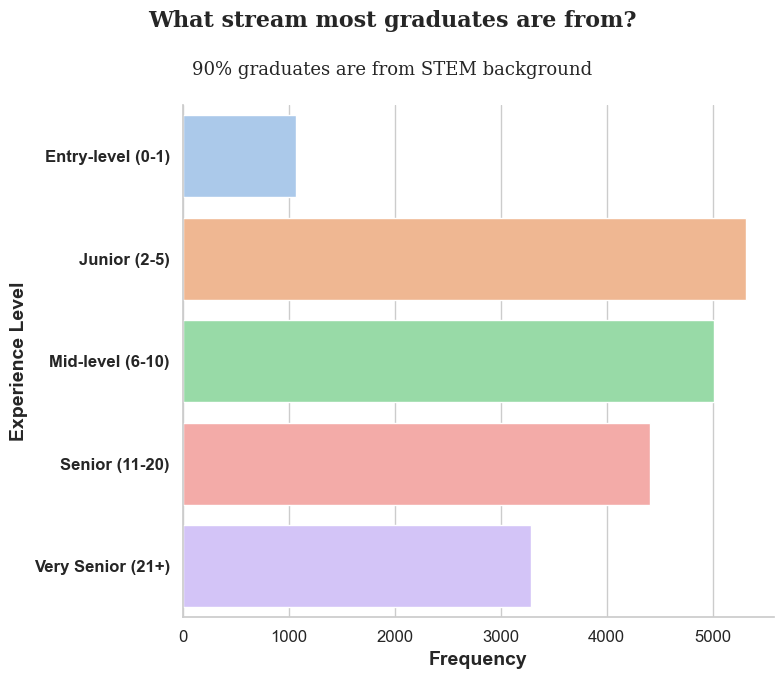

In [49]:
# EXPERIENCE LEVEL
explevel_counts = df_train['experience_set'].value_counts()
total_count = len(df_train)
explevel_percentages = (explevel_counts / total_count) * 100

# Sort the counts and percentages in ascending order
sorted_data = explevel_counts.sort_values(ascending=True)
sorted_percentages = (sorted_data / total_count) * 100

# Create the horizontal bar chart using seaborn
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size for better visibility
sns.set_theme(style='whitegrid')

# Improved color palette for better differentiation
palette = sns.color_palette("pastel")

# Seaborn horizontal barplot with percentage and frequency
sns.barplot(x=sorted_data.values, y=sorted_data.index, ax=ax, palette=palette, orient='h')

# Add percentage labels at the end of each bar
#for i, (count, percentage) in enumerate(zip(sorted_data.values, sorted_percentages)):
 #   ax.text(count + 0.1, i, f'{percentage:.2f}%', ha='left', va='center', fontsize=12, fontweight='bold')

# Add labels and title with improved styling
ax.set_xlabel('Frequency', fontsize=14, fontweight='bold')
ax.set_ylabel('Experience Level', fontsize=14, fontweight='bold')
#ax.set_title('Experience Level Distribution', fontsize=16, fontweight='bold', color='navy', pad=30)

# Customizing the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.setp(ax.get_yticklabels(), fontweight='bold')

# Removing the top and right borders for a cleaner look
sns.despine()

# Add informative subtitle
fig.text(0.5, 1.1, 'What stream most graduates are from?', fontfamily='serif', fontsize=16, fontweight='bold', ha='center')
fig.text(0.5, 1.02, '90% graduates are from STEM background', fontfamily='serif', fontsize=13, ha='center')

# Show the plot
plt.tight_layout()
plt.show()

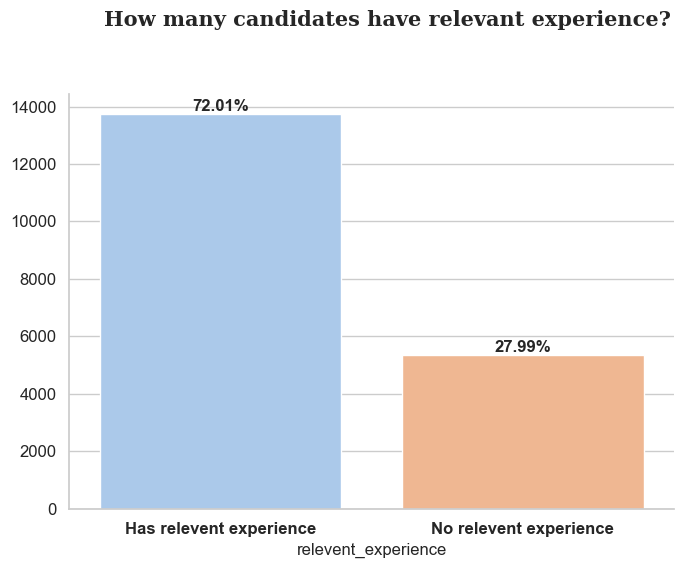

In [72]:
# RELEVANT EXPERIENCE
relexp_counts = df_train['relevent_experience'].value_counts()
total_count = len(df_train)
relexp_percentages = (relexp_counts / total_count) * 100

# Create the bar chart using seaborn
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_theme(style='whitegrid')

# Improved color palette for better differentiation
palette = sns.color_palette("pastel")

# Seaborn barplot with percentage and frequency
sns.barplot(x=relexp_counts.index, y=relexp_counts.values, ax=ax, palette=palette)

# Add percentage labels at the top of each bar
for i, percentage in enumerate(relexp_percentages):
    ax.text(i, relexp_counts.values[i] + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels and title with improved styling
#ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
#ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
#ax.set_title('Gender Distribution of Candidates', fontsize=16, fontweight='bold', color='navy', pad=30)

# Customizing the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.setp(ax.get_xticklabels(), fontweight='bold')

# Removing the top and right borders for a cleaner look
sns.despine()

# Add informative subtitle
#fig.text(0.8, 0.87, 'It seems 92% of candidates are male', fontsize=12, color='gray', ha='center')
fig.text(0.160,1.1,'How many candidates have relevant experience?', fontfamily='serif',fontsize=15, fontweight='bold')
#fig.text(0.125,1.02,'Most of the candidates are graduates',fontfamily='serif',fontsize=12) 
# Show the plot
plt.tight_layout()
plt.show()

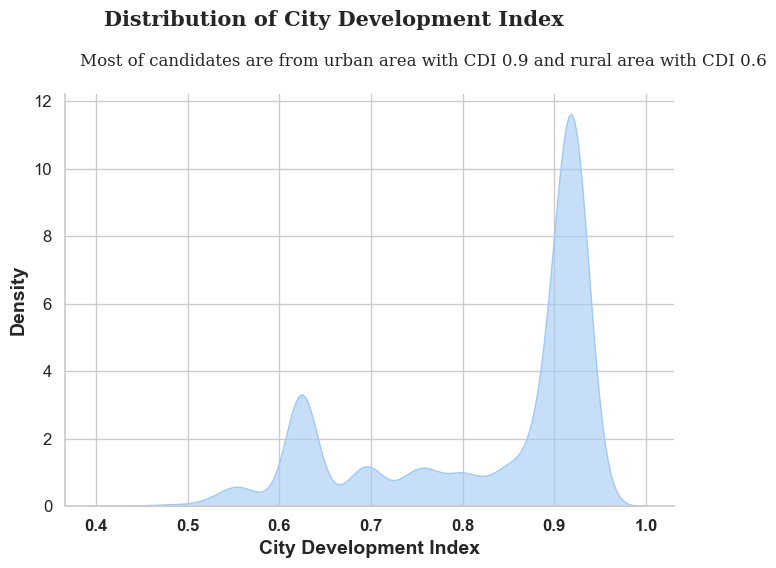

In [73]:
# Plotting the Area Density Plot for City Development Index
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_theme(style='whitegrid')

# Improved color palette
palette = sns.color_palette("pastel")

# Seaborn KDE plot with filled area
sns.kdeplot(data=df_train, x='city_development_index', fill=True, alpha=0.6, color=palette[0], ax=ax)

# Add labels and title with improved styling
ax.set_xlabel('City Development Index', fontsize=14, fontweight='bold')
ax.set_ylabel('Density', fontsize=14, fontweight='bold')
#ax.set_title('Area Density Plot of City Development Index', fontsize=16, fontweight='bold', color='navy', pad=30)

# Customizing the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.setp(ax.get_xticklabels(), fontweight='bold')

# Removing the top and right borders for a cleaner look
sns.despine()

# Add an informative subtitle
#fig.text(0.150, 1.1, 'Distribution of City Development Index', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.160,1.1,'Distribution of City Development Index', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,1.02,'Most of candidates are from urban area with CDI 0.9 and rural area with CDI 0.6',fontfamily='serif',fontsize=12) 
# Show the plot
# Show the plot
plt.tight_layout()
plt.show()

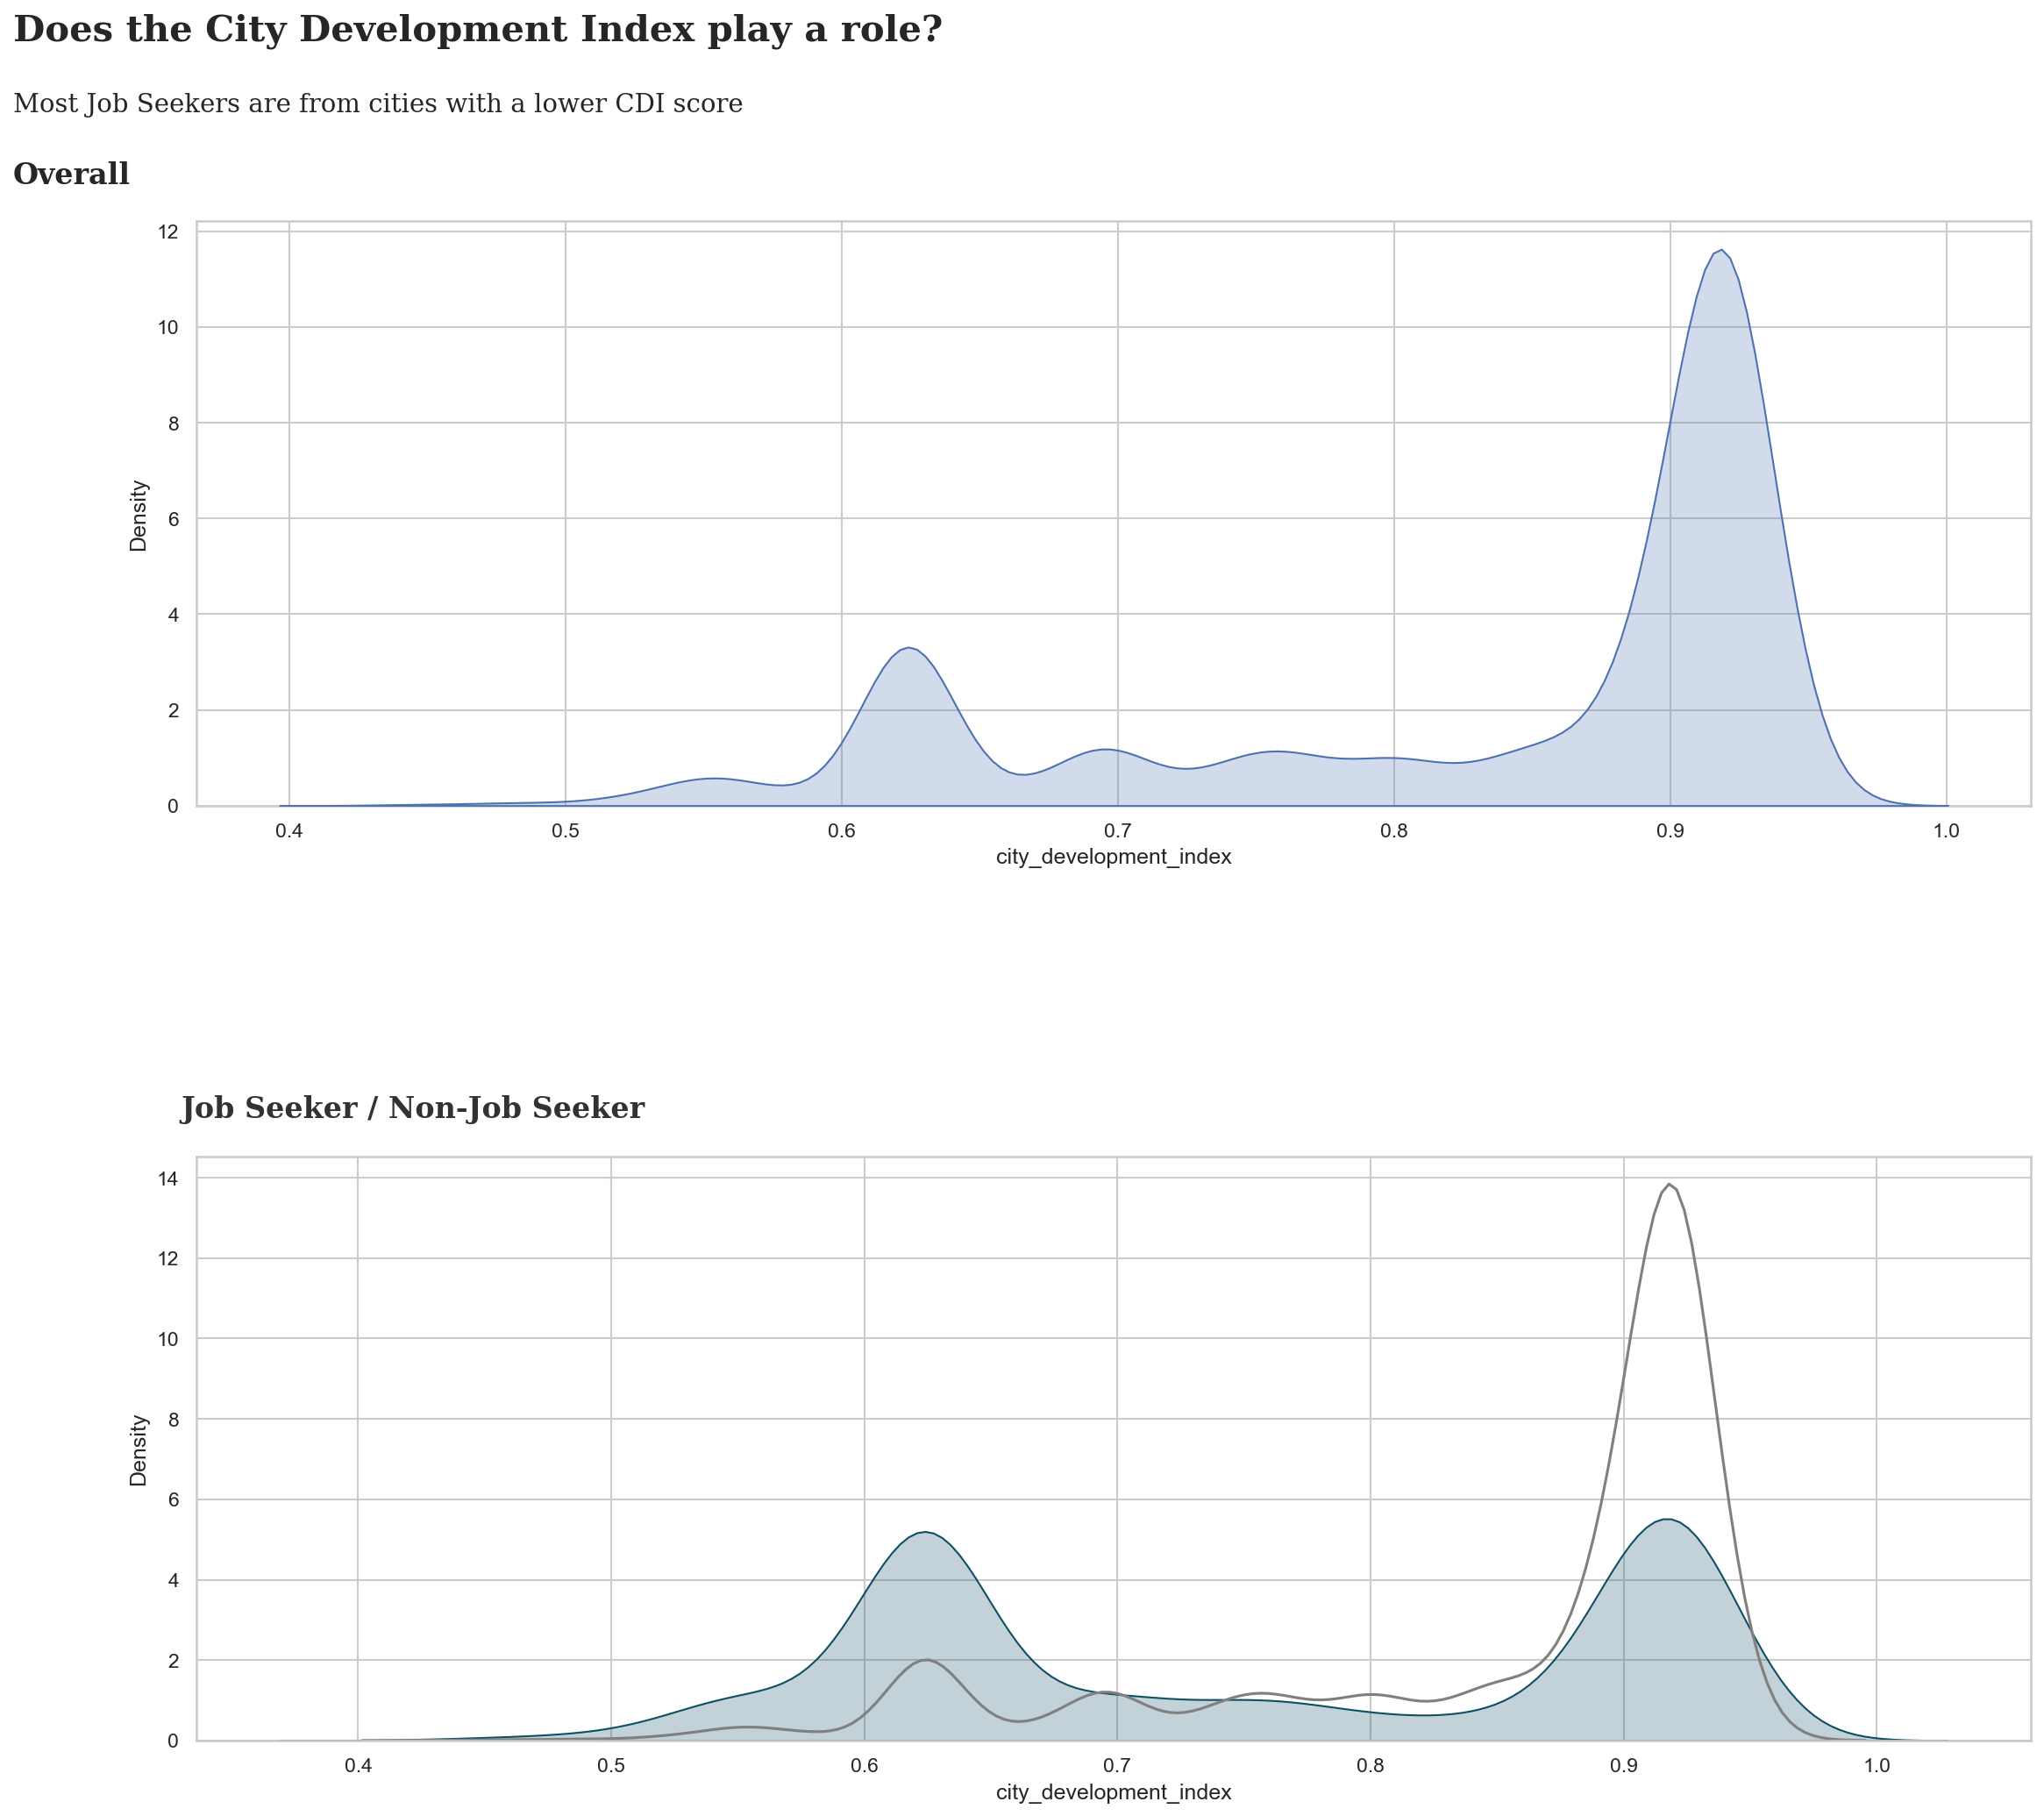

In [82]:
color_palette=["gray","#0e4f66"]


sns.set_theme(style='whitegrid')

# Improved color palette
palette = sns.color_palette("pastel")

fig = plt.figure(figsize=(18,15), dpi=150)
#fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

# CDI
ax0.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(0.3, 14.5, 'Most Job Seekers are from cities with a lower CDI score', fontsize=14, fontweight='light', fontfamily='serif')
ax0.text(0.3, 13, 'Overall', fontsize=16, fontweight='bold', fontfamily='serif')
sns.kdeplot(df_train["city_development_index"], shade=True, ax=ax0, zorder=3)



ax1.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=16, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(df_train.loc[(df_train["target"]==0), "city_development_index"], color="gray", label="Not Survived", ax=ax1)
sns.kdeplot(df_train.loc[(df_train["target"]==1), "city_development_index"], color="#0e4f66", label="Survived", ax=ax1, shade=True)
            
plt.tight_layout()
plt.show()

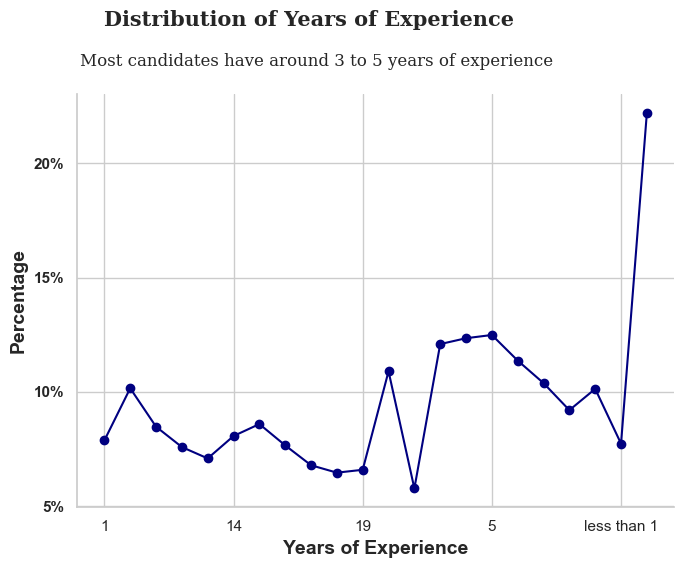

In [75]:
import matplotlib.ticker as mtick

# Plotting the experience percentage
fig, ax = plt.subplots(figsize=(7, 5))
sns.set_theme(style='whitegrid')

# Improved color palette
palette = sns.color_palette("pastel")

# Create a DataFrame from the value counts of experience and reset the index
train = df_train["experience"].value_counts().reset_index()
train.columns = ['experience', 'count']

# Calculate the percentage
train["Percentage"] = train["count"].apply(lambda x: x / sum(train["count"]) * 100)

# Sort by experience (assuming it's numerical)
train = train.sort_values('experience')

# Plotting the experience percentage
ax.plot(train['experience'], train["Percentage"], zorder=3, marker='o', color="navy")

# Adding labels, title, and formatting the ticks
ax.set_xlabel('Years of Experience', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage', fontsize=14, fontweight='bold')

# Customizing the y-axis ticks
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%', '25%'], fontweight='bold')

# Customizing the x-axis to display experience values
ax.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax.yaxis.set_major_locator(mtick.MultipleLocator(5))

# Removing the top and right borders for a cleaner look
sns.despine()

# Adding an informative subtitle
fig.text(0.160, 1.1, 'Distribution of Years of Experience', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 1.02, 'Most candidates have around 3 to 5 years of experience', fontfamily='serif', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

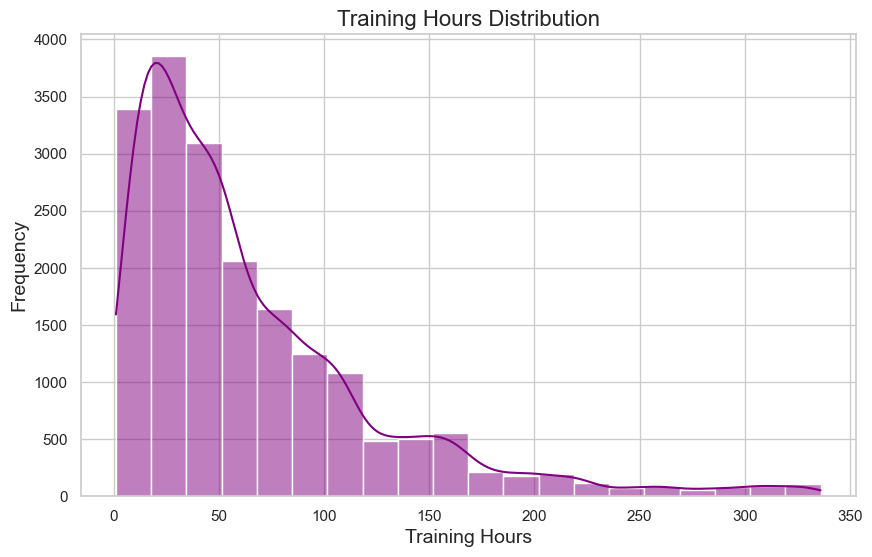

In [87]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(df_train['training_hours'], bins=20, color='purple', kde=True)

# Add titles and labels
plt.title('Training Hours Distribution', fontsize=16)
plt.xlabel('Training Hours', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

fig.text(0.160, 1.1, 'Training Hours Distribution', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 1.02, 'Most candidates have training hours 0 to 50 Hrs', fontfamily='serif', fontsize=12)

# Show the plot
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['city'] = label_encoder.fit_transform(df_train['city'])
df_test['city'] = label_encoder.transform(df_test['city'])
df_train['gender'] = label_encoder.fit_transform(df_train['gender'])
df_test['gender'] = label_encoder.transform(df_test['gender'])
df_train['relevent_experience'] = label_encoder.fit_transform(df_train['relevent_experience'])
df_test['relevent_experience'] = label_encoder.transform(df_test['relevent_experience'])
df_train['enrolled_university'] = label_encoder.fit_transform(df_train['enrolled_university'])
df_test['enrolled_university'] = label_encoder.transform(df_test['enrolled_university'])
df_train['education_level'] = label_encoder.fit_transform(df_train['education_level'])
df_test['education_level'] = label_encoder.transform(df_test['education_level'])
df_train['company_size'] = label_encoder.fit_transform(df_train['company_size'])
df_test['company_size'] = label_encoder.transform(df_test['company_size'])
df_train['company_type'] = label_encoder.fit_transform(df_train['company_type'])
df_test['company_type'] = label_encoder.transform(df_test['company_type'])
df_train['last_new_job'] = label_encoder.fit_transform(df_train['last_new_job'])
df_test['last_new_job'] = label_encoder.transform(df_test['last_new_job'])
df_train['major_discipline'] = label_encoder.fit_transform(df_train['major_discipline'])
df_test['major_discipline'] = label_encoder.transform(df_test['major_discipline'])

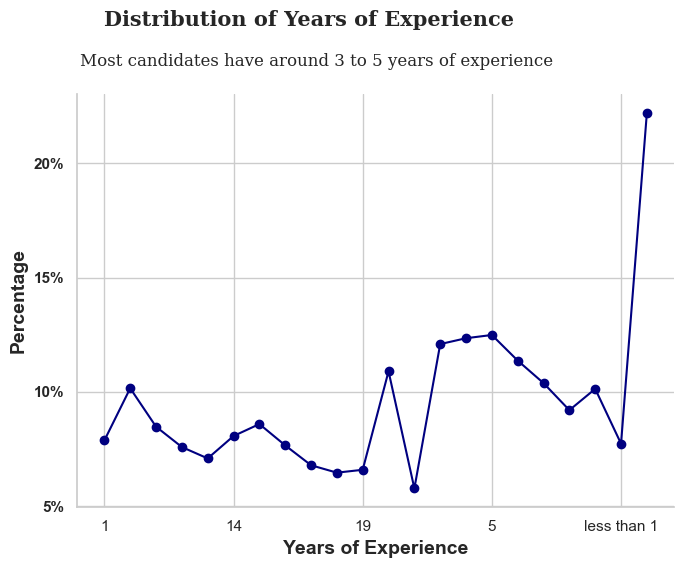

In [52]:
#experience_set
df_train = df_train.drop('experience_set', axis=1)
df_test = df_test.drop('experience_set', axis=1)

# Data Balancing using Random Oversampling

In [53]:
#random oversampling

train1=df_train
test1=df_train

import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

X = train1.drop('target', axis=1)  # All features
y = train1['target'] 

# Create RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert resampled data to DataFrame (optional)
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['target'])
print(f'Original dataset class distribution: {Counter(y)}')

Original dataset class distribution: Counter({0: 14339, 1: 4754})


In [54]:
print(f'Resampled dataset class distribution: {Counter(y_resampled["target"])}')

Resampled dataset class distribution: Counter({1: 14339, 0: 14339})


In [55]:
X_train1=X_resampled
y_train1=y_resampled

X_test1 = test1.drop('target', axis=1)  # All features
y_test1 = test1['target']

In [56]:
#decision tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred1 = dt_classifier.predict(X_test1)

# Evaluate the model performance
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14339
           1       1.00      1.00      1.00      4754

    accuracy                           1.00     19093
   macro avg       1.00      1.00      1.00     19093
weighted avg       1.00      1.00      1.00     19093

Confusion Matrix:
[[14339     0]
 [    0  4754]]


In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the resampled training data
rf_classifier.fit(X_train1, y_train1)


# Make predictions on the test data
y_pred1 = rf_classifier.predict(X_test1)

# Evaluate the model performance
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14339
           1       1.00      1.00      1.00      4754

    accuracy                           1.00     19093
   macro avg       1.00      1.00      1.00     19093
weighted avg       1.00      1.00      1.00     19093

Confusion Matrix:
[[14339     0]
 [    0  4754]]


# Sampling using SMOTE Algorithm

In [59]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(random_state=42)
train2=df_train
test2=df_test

X_train2 = train2.drop('target', axis=1)  # All features
y_train2 = train2['target']

X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

X_test2=X_test1
y_test2=y_test1


rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_resampled2, y_resampled2)
y_pred2 = rf_classifier.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_test2, y_pred2))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14339
           1       1.00      1.00      1.00      4754

    accuracy                           1.00     19093
   macro avg       1.00      1.00      1.00     19093
weighted avg       1.00      1.00      1.00     19093

Confusion Matrix:
[[14339     0]
 [    0  4754]]
